In [4]:
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import numpy as np
import matplotlib.pyplot as plt
import jax
import copy
import queue
from shower_sim_instrumented import simulator

%load_ext autoreload
%autoreload 2

In [6]:

from shower_sim_optimize import optimize, program_to_optimize
from shower_sim_baseline import summary_metric
the_program = program_to_optimize(simulator, summary_metric, sim_kwargs={'reuse_rvs': True, 'split_prob': 1.0})

In [8]:
hits,active,history,scores,out_st = simulator(3.5, split_prob=1.0)
print(scores, out_st['w'], hits.size, out_st['y']['hits'].size)

-17.742678 40.78795560542494 2572 2332


In [9]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 500

print("#### STAD ####")
opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad")

print("#### SCORE ####")
opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False)

print("#### SCORE Baseline ####")
opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True)

print("#### NUMERIC ####")
opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric")

#### STAD ####


100%|██████████| 500/500 [01:31<00:00,  5.47it/s]


#### SCORE ####


100%|██████████| 500/500 [01:39<00:00,  5.05it/s]


#### SCORE Baseline ####


100%|██████████| 500/500 [01:29<00:00,  5.58it/s]


#### NUMERIC ####


100%|██████████| 500/500 [03:22<00:00,  2.47it/s]


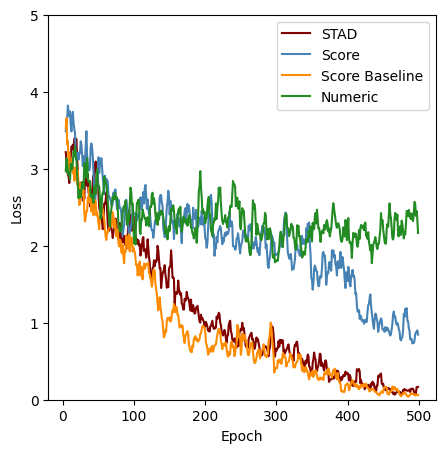

In [10]:
from plots_optimization import plot_single_opt_comparison
f,ax = plt.subplots()
plot_single_opt_comparison(ax,l_st, l_s, l_sb, l_n)
f.set_size_inches(5,5)

# With Error Bands

In [11]:
theta_init = 3.0
Nmini=2
LR = 0.01
Nepoch = 500 

Nopt = 10

opt_par_st_list, par_st_list, l_st_list, g_st_list = [], [], [], []
opt_par_s_list, par_s_list, l_s_list, g_s_list = [], [], [], []
opt_par_sb_list, par_sb_list, l_sb_list, g_sb_list = [], [], [], []
opt_par_n_list, par_n_list, l_n_list, g_n_list = [], [], [], []

for j in range(Nopt):
    print("######## Optimization", j, "########")
    
    opt_par_st, par_st, l_st, g_st = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "stad", doprint=False)
    opt_par_st_list.append(par_st)
    par_st_list.append(par_st) 
    l_st_list.append(l_st)
    g_st_list.append(g_st)
    print("STAD Loss final= {:5.3f}".format(l_st[-1]), "Loss min= {:5.3f}".format(np.min(l_st)))

    opt_par_s, par_s, l_s, g_s = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=False, doprint=False)
    opt_par_s_list.append(par_s)
    par_s_list.append(par_s) 
    l_s_list.append(l_s)
    g_s_list.append(g_s)
    print("Score Loss final= {:5.3f}".format(l_s[-1]), "Loss min= {:5.3f}".format(np.min(l_s)))
    
    opt_par_sb, par_sb, l_sb, g_sb = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "score", dobaseline=True, doprint=False)
    opt_par_sb_list.append(par_sb)
    par_sb_list.append(par_sb) 
    l_sb_list.append(l_sb)
    g_sb_list.append(g_sb)
    print("Score (baseline) Loss final= {:5.3f}".format(l_sb[-1]), "Loss min= {:5.3f}".format(np.min(l_sb)))
    
    opt_par_n, par_n, l_n, g_n = optimize(the_program, theta_init, LR, Nepoch, Nmini, grad_type = "numeric", doprint=False)
    opt_par_n_list.append(par_n)
    par_n_list.append(par_n) 
    l_n_list.append(l_n)
    g_n_list.append(g_n)
    print("Numeric Loss final= {:5.3f}".format(l_n[-1]), "Loss min= {:5.3f}".format(np.min(l_n)))
    
    

######## Optimization 0 ########


100%|██████████| 500/500 [01:30<00:00,  5.55it/s]


STAD Loss final= 0.143 Loss min= 0.004


100%|██████████| 500/500 [01:34<00:00,  5.27it/s]


Score Loss final= 1.192 Loss min= 0.340


100%|██████████| 500/500 [01:32<00:00,  5.42it/s]


Score (baseline) Loss final= 0.264 Loss min= 0.041


100%|██████████| 500/500 [03:18<00:00,  2.52it/s]


Numeric Loss final= 1.982 Loss min= 1.394
######## Optimization 1 ########


100%|██████████| 500/500 [01:28<00:00,  5.63it/s]


STAD Loss final= 0.049 Loss min= 0.020


100%|██████████| 500/500 [01:33<00:00,  5.32it/s]


Score Loss final= 0.460 Loss min= 0.291


100%|██████████| 500/500 [01:28<00:00,  5.67it/s]


Score (baseline) Loss final= 0.188 Loss min= 0.005


100%|██████████| 500/500 [03:18<00:00,  2.52it/s]


Numeric Loss final= 1.867 Loss min= 1.545
######## Optimization 2 ########


100%|██████████| 500/500 [01:27<00:00,  5.74it/s]


STAD Loss final= 0.127 Loss min= 0.002


100%|██████████| 500/500 [01:37<00:00,  5.13it/s]


Score Loss final= 0.947 Loss min= 0.735


100%|██████████| 500/500 [01:27<00:00,  5.71it/s]


Score (baseline) Loss final= 0.010 Loss min= 0.004


100%|██████████| 500/500 [03:17<00:00,  2.53it/s]


Numeric Loss final= 2.104 Loss min= 1.959
######## Optimization 3 ########


100%|██████████| 500/500 [01:27<00:00,  5.72it/s]


STAD Loss final= 0.076 Loss min= 0.024


100%|██████████| 500/500 [01:34<00:00,  5.31it/s]


Score Loss final= 1.296 Loss min= 0.526


100%|██████████| 500/500 [01:26<00:00,  5.78it/s]


Score (baseline) Loss final= 0.026 Loss min= 0.001


100%|██████████| 500/500 [03:11<00:00,  2.61it/s]


Numeric Loss final= 2.088 Loss min= 1.357
######## Optimization 4 ########


100%|██████████| 500/500 [01:26<00:00,  5.78it/s]


STAD Loss final= 0.529 Loss min= 0.006


100%|██████████| 500/500 [01:30<00:00,  5.55it/s]


Score Loss final= 0.899 Loss min= 0.234


100%|██████████| 500/500 [01:26<00:00,  5.75it/s]


Score (baseline) Loss final= 0.049 Loss min= 0.001


100%|██████████| 500/500 [03:13<00:00,  2.58it/s]


Numeric Loss final= 1.809 Loss min= 1.431
######## Optimization 5 ########


100%|██████████| 500/500 [01:29<00:00,  5.60it/s]


STAD Loss final= 0.058 Loss min= 0.007


100%|██████████| 500/500 [01:31<00:00,  5.46it/s]


Score Loss final= 0.235 Loss min= 0.202


100%|██████████| 500/500 [01:26<00:00,  5.80it/s]


Score (baseline) Loss final= 0.325 Loss min= 0.002


100%|██████████| 500/500 [03:21<00:00,  2.48it/s]


Numeric Loss final= 3.011 Loss min= 2.328
######## Optimization 6 ########


100%|██████████| 500/500 [01:28<00:00,  5.66it/s]


STAD Loss final= 0.126 Loss min= 0.012


100%|██████████| 500/500 [01:36<00:00,  5.17it/s]


Score Loss final= 1.165 Loss min= 0.863


100%|██████████| 500/500 [01:32<00:00,  5.39it/s]


Score (baseline) Loss final= 0.608 Loss min= 0.241


100%|██████████| 500/500 [03:15<00:00,  2.55it/s]


Numeric Loss final= 1.656 Loss min= 1.355
######## Optimization 7 ########


100%|██████████| 500/500 [01:26<00:00,  5.78it/s]


STAD Loss final= 0.098 Loss min= 0.004


100%|██████████| 500/500 [01:35<00:00,  5.22it/s]


Score Loss final= 0.686 Loss min= 0.594


100%|██████████| 500/500 [01:27<00:00,  5.70it/s]


Score (baseline) Loss final= 0.038 Loss min= 0.001


100%|██████████| 500/500 [03:13<00:00,  2.59it/s]


Numeric Loss final= 2.302 Loss min= 1.445
######## Optimization 8 ########


100%|██████████| 500/500 [01:28<00:00,  5.63it/s]


STAD Loss final= 0.583 Loss min= 0.025


100%|██████████| 500/500 [01:38<00:00,  5.06it/s]


Score Loss final= 2.012 Loss min= 1.303


100%|██████████| 500/500 [01:27<00:00,  5.69it/s]


Score (baseline) Loss final= 0.158 Loss min= 0.001


100%|██████████| 500/500 [03:18<00:00,  2.52it/s]


Numeric Loss final= 1.942 Loss min= 1.635
######## Optimization 9 ########


100%|██████████| 500/500 [17:01<00:00,  2.04s/it]   


STAD Loss final= 0.045 Loss min= 0.005


100%|██████████| 500/500 [01:31<00:00,  5.49it/s]


Score Loss final= 0.592 Loss min= 0.269


100%|██████████| 500/500 [01:25<00:00,  5.84it/s]


Score (baseline) Loss final= 0.042 Loss min= 0.000


100%|██████████| 500/500 [03:13<00:00,  2.58it/s]

Numeric Loss final= 2.035 Loss min= 1.431


In [34]:
l_st_list = np.array(l_st_list)
l_st_list_mean = np.mean(l_st_list, axis=0)
l_st_list_std = np.std(l_st_list, axis=0)

g_st_list = np.array(g_st_list)
g_st_list_mean = np.mean(g_st_list, axis=0)
g_st_list_std = np.std(g_st_list, axis=0)

l_s_list = np.array(l_s_list)
l_s_list_mean = np.mean(l_s_list, axis=0)
l_s_list_std = np.std(l_s_list, axis=0)

g_s_list = np.array(g_s_list)
g_s_list_mean = np.mean(g_s_list, axis=0)
g_s_list_std = np.std(g_s_list, axis=0)

l_sb_list = np.array(l_sb_list)
l_sb_list_mean = np.mean(l_sb_list, axis=0)
l_sb_list_std = np.std(l_sb_list, axis=0)

g_sb_list = np.array(g_sb_list)
g_sb_list_mean = np.mean(g_sb_list, axis=0)
g_sb_list_std = np.std(g_sb_list, axis=0)

l_n_list = np.array(l_n_list)
l_n_list_mean = np.mean(l_n_list, axis=0)
l_n_list_std = np.std(l_n_list, axis=0)

g_n_list = np.array(g_n_list)
g_n_list_mean = np.mean(g_n_list, axis=0)
g_n_list_std = np.std(g_n_list, axis=0)

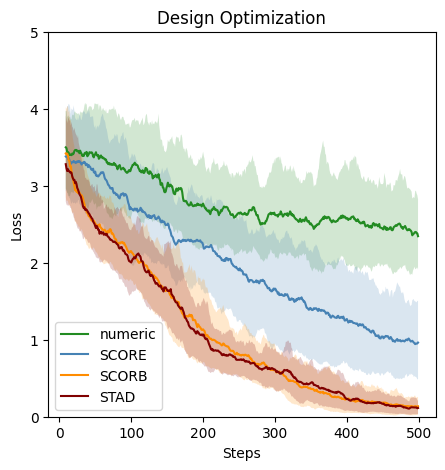

In [35]:
from plots_optimization import plot_optimization_comparison

f,ax = plt.subplots(1,1)
plot_optimization_comparison(ax, l_st_list,
    l_s_list,
    l_n_list,
    l_sb_list
)
f.set_size_inches(5,5)
f.savefig('optim.pdf')

In [72]:
!open .